In [23]:
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pickle

# Load data and embeddings

In [2]:
!git clone https://github.com/hwalli92/nlp_project.git

Cloning into 'nlp_project'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 102 (delta 35), reused 74 (delta 17), pack-reused 3
Receiving objects: 100% (102/102), 47.13 MiB | 25.08 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [3]:
%cd nlp_project

/content/nlp_project


In [4]:
with open("HateXPlainData/trainHateXplain", "rb") as file:
  train_data = pickle.load(file)

with open("HateXPlainData/valHateXplain", "rb") as file:
  val_data = pickle.load(file)

with open("HateXPlainData/testHateXplain", "rb") as file:
  test_data = pickle.load(file)

In [5]:
train_w2v = np.load("HateXPlainData/Train_W2V_Embeddings.npy")
train_glove = np.load("HateXPlainData/Train_GloVe_Embeddings.npy")

val_w2v = np.load("HateXPlainData/Val_W2V_Embeddings.npy")
val_glove = np.load("HateXPlainData/Val_GloVe_Embeddings.npy")

test_w2v = np.load("HateXPlainData/Test_W2V_Embeddings.npy")
test_glove = np.load("HateXPlainData/Test_GloVe_Embeddings.npy")

# Process data

In [6]:
labels = {'offensive': 2, 'hatespeech': 1, 'normal': 0}

train_tokens, train_labels = zip(*train_data)
train_labels = np.array([labels[l] for l in train_labels])

val_tokens, val_labels = zip(*val_data)
val_labels = [labels[l] for l in val_labels]

test_tokens, test_labels = zip(*test_data)
test_labels = np.array([labels[l] for l in test_labels])


# Naive Bayes w/ Word2Vec

In [13]:
w2v_model = MultinomialNB()

max_train = np.max(train_w2v)
min_train = np.min(train_w2v)
train_w2v = (train_w2v - min_train) / (max_train - min_train)

w2v_model.fit(train_w2v, train_labels)

max_val = np.max(val_w2v)
min_val = np.min(val_w2v)
val_w2v = (val_w2v - min_val) / (max_val - min_val)

max_test = np.max(test_w2v)
min_test = np.min(test_w2v)
test_w2v = (test_w2v - min_test) / (max_test - min_test)


y_train_w2v_pred = w2v_model.predict(train_w2v)
y_val_w2v_pred = w2v_model.predict(val_w2v)
y_test_w2v_pred = w2v_model.predict(test_w2v)


Train Data Accuracy: 0.41
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      6251
           1       1.00      0.00      0.00      4748
           2       0.00      0.00      0.00      4384

    accuracy                           0.41     15383
   macro avg       0.47      0.33      0.19     15383
weighted avg       0.47      0.41      0.24     15383



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


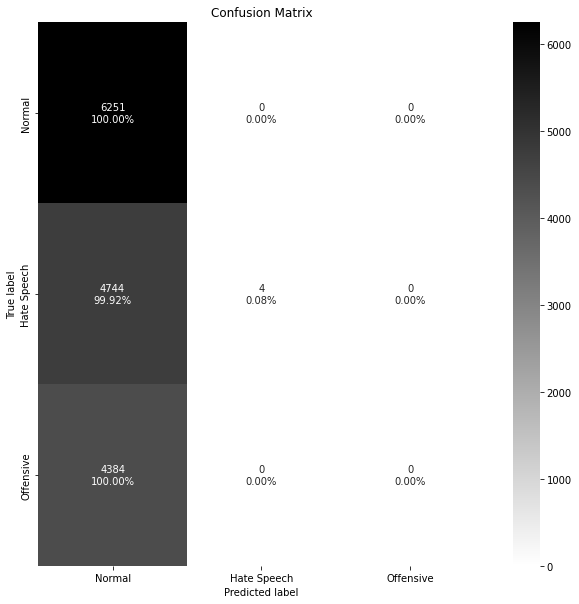

In [14]:
print("Train Data Accuracy: {0:0.2f}".format(accuracy_score(train_labels, y_train_w2v_pred)))
    
print(classification_report(train_labels, y_train_w2v_pred))
cf_matrix = confusion_matrix(train_labels, y_train_w2v_pred)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Validation Data Accuracy: 0.41
              precision    recall  f1-score   support

           0       0.41      1.00      0.58       781
           1       0.00      0.00      0.00       593
           2       0.00      0.00      0.00       548

    accuracy                           0.41      1922
   macro avg       0.14      0.33      0.19      1922
weighted avg       0.17      0.41      0.23      1922



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


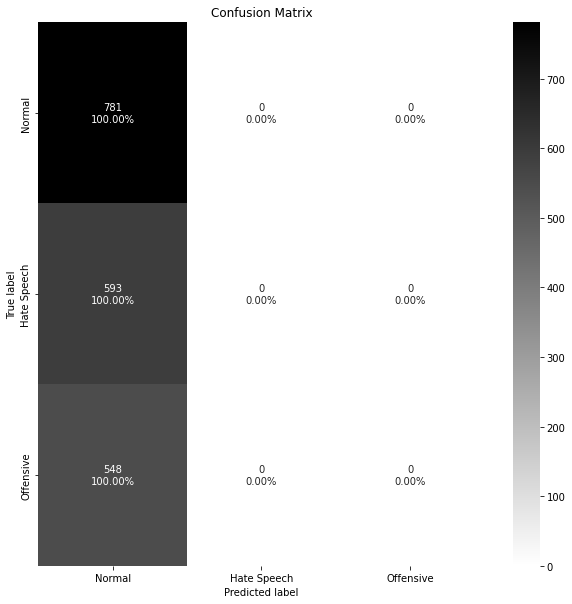

In [15]:
print("Validation Data Accuracy: {0:0.2f}".format(accuracy_score(val_labels, y_val_w2v_pred)))
    
print(classification_report(val_labels, y_val_w2v_pred))
cf_matrix = confusion_matrix(val_labels, y_val_w2v_pred)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Test Data Accuracy: 0.41
              precision    recall  f1-score   support

           0       0.41      1.00      0.58       782
           1       0.50      0.00      0.00       594
           2       0.00      0.00      0.00       548

    accuracy                           0.41      1924
   macro avg       0.30      0.33      0.19      1924
weighted avg       0.32      0.41      0.24      1924



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


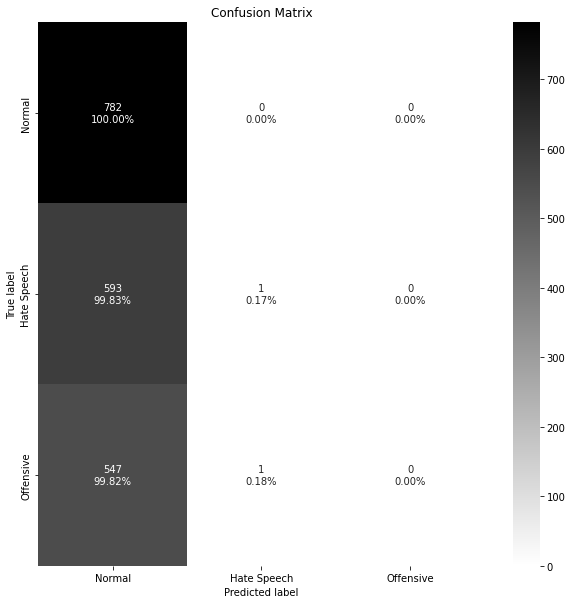

In [16]:
print("Test Data Accuracy: {0:0.2f}".format(accuracy_score(test_labels, y_test_w2v_pred)))
    
print(classification_report(test_labels, y_test_w2v_pred))
cf_matrix = confusion_matrix(test_labels, y_test_w2v_pred)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Naive Bayes w/ GloVe

In [17]:
glove_model = MultinomialNB()

max_train = np.max(train_glove)
min_train = np.min(train_glove)
train_glove = (train_glove - min_train) / (max_train - min_train)

glove_model.fit(train_glove, train_labels)

max_val = np.max(val_glove)
min_val = np.min(val_glove)
val_glove = (val_glove - min_val) / (max_val - min_val)

max_test = np.max(test_glove)
min_test = np.min(test_glove)
test_glove = (test_glove - min_test) / (max_test - min_test)

y_train_glove_pred = glove_model.predict(train_glove)
y_val_glove_pred = glove_model.predict(val_glove)
y_test_glove_pred = glove_model.predict(test_glove)

Train Data Accuracy: 0.41
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      6251
           1       0.00      0.00      0.00      4748
           2       0.00      0.00      0.00      4384

    accuracy                           0.41     15383
   macro avg       0.14      0.33      0.19     15383
weighted avg       0.17      0.41      0.23     15383



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


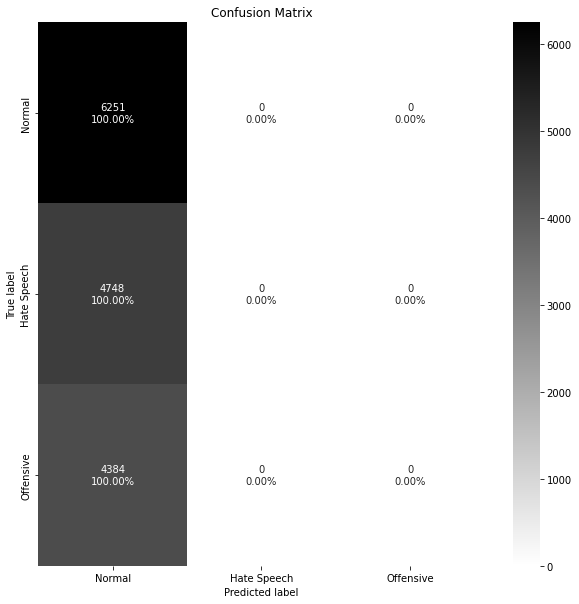

In [18]:
print("Train Data Accuracy: {0:0.2f}".format(accuracy_score(train_labels, y_train_glove_pred)))
    
print(classification_report(train_labels, y_train_glove_pred))
cf_matrix = confusion_matrix(train_labels, y_train_glove_pred)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Validation Data Accuracy: 0.41
              precision    recall  f1-score   support

           0       0.41      1.00      0.58       781
           1       0.00      0.00      0.00       593
           2       0.00      0.00      0.00       548

    accuracy                           0.41      1922
   macro avg       0.14      0.33      0.19      1922
weighted avg       0.17      0.41      0.23      1922



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


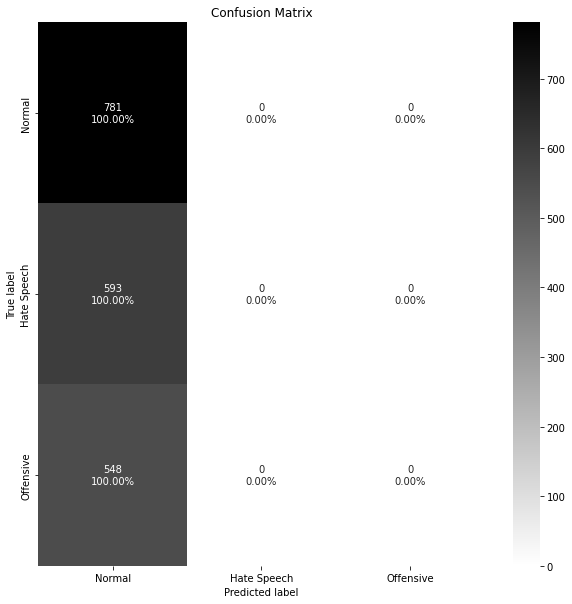

In [19]:
print("Validation Data Accuracy: {0:0.2f}".format(accuracy_score(val_labels, y_val_glove_pred)))
    
print(classification_report(val_labels, y_val_glove_pred))
cf_matrix = confusion_matrix(val_labels, y_val_glove_pred)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Test Data Accuracy: 0.41
              precision    recall  f1-score   support

           0       0.41      1.00      0.58       782
           1       0.00      0.00      0.00       594
           2       0.00      0.00      0.00       548

    accuracy                           0.41      1924
   macro avg       0.14      0.33      0.19      1924
weighted avg       0.17      0.41      0.23      1924



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


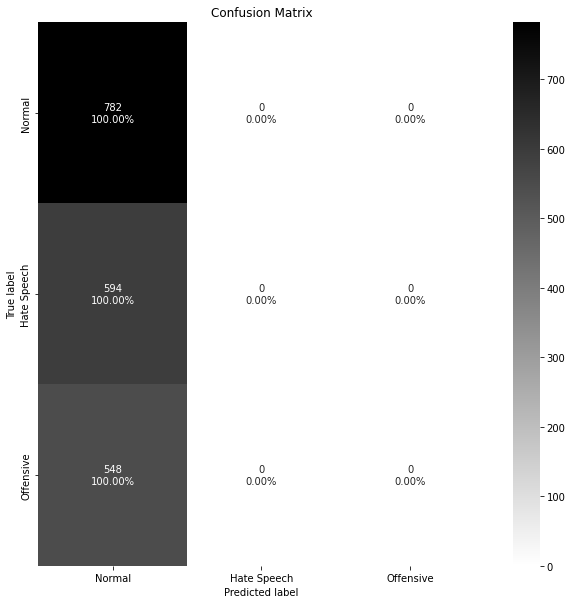

In [20]:
print("Test Data Accuracy: {0:0.2f}".format(accuracy_score(test_labels, y_test_glove_pred)))
    
print(classification_report(test_labels, y_test_glove_pred))
cf_matrix = confusion_matrix(test_labels, y_test_glove_pred)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



# Naive Bayes w/ Token Counts

In [21]:
class NaiveBayesClassifier:
  def __init__(self):
    self.vectorizer =  CountVectorizer()
    self.classifier = MultinomialNB()

  def train(self, X_train, y_train):
    X_train_f = self.vectorizer.fit_transform(X_train)
    self.classifier.fit(X_train_f, y_train)
    return X_train_f

  def predict(self, X_test):
    X_test_f = self.vectorizer.transform(X_test)
    y_pred = self.classifier.predict(X_test_f)
    return y_pred, X_test_f

In [25]:
classifier = NaiveBayesClassifier()
train_strings = [' '.join(string) for string in train_tokens]
X_train_f = classifier.train(train_strings, train_labels)
y_pred_train_tkcount, _ = classifier.predict(train_strings)
val_strings = [' '.join(string) for string in val_tokens]
y_pred_val_tkcount, _ = classifier.predict(val_strings)
test_strings = [' '.join(string) for string in test_tokens]
y_pred_test_tkcount, _ = classifier.predict(test_strings)

Train Data Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      6251
           1       0.86      0.89      0.87      4748
           2       0.87      0.70      0.77      4384

    accuracy                           0.84     15383
   macro avg       0.85      0.83      0.84     15383
weighted avg       0.85      0.84      0.84     15383



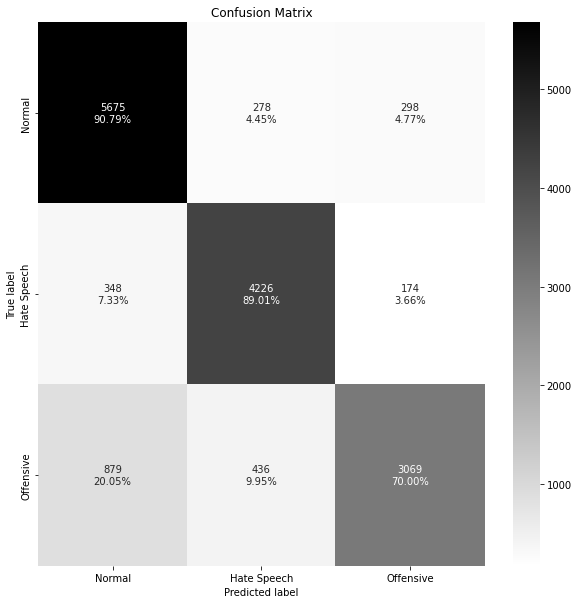

In [26]:
print("Train Data Accuracy: {0:0.2f}".format(accuracy_score(train_labels, y_pred_train_tkcount)))
    
print(classification_report(train_labels, y_pred_train_tkcount))
cf_matrix = confusion_matrix(train_labels, y_pred_train_tkcount)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



Validation Data Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       781
           1       0.67      0.72      0.69       593
           2       0.53      0.36      0.43       548

    accuracy                           0.63      1922
   macro avg       0.61      0.61      0.60      1922
weighted avg       0.62      0.63      0.62      1922



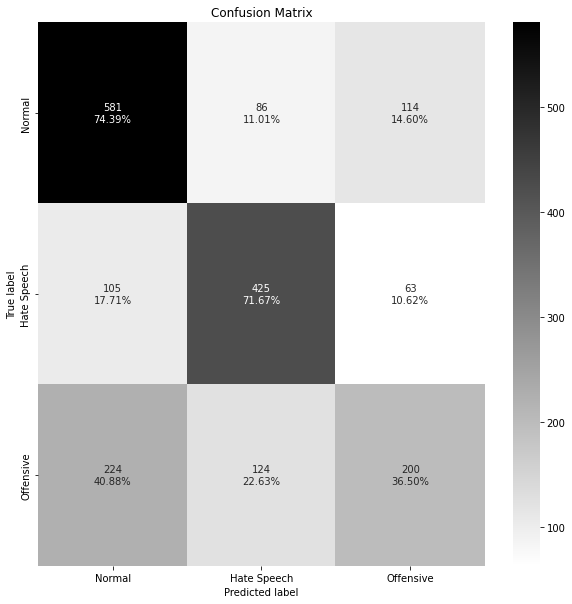

In [27]:
print("Validation Data Accuracy: {0:0.2f}".format(accuracy_score(val_labels, y_pred_val_tkcount)))
    
print(classification_report(val_labels, y_pred_val_tkcount))
cf_matrix = confusion_matrix(val_labels, y_pred_val_tkcount)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Test Data Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       782
           1       0.67      0.76      0.71       594
           2       0.53      0.34      0.42       548

    accuracy                           0.64      1924
   macro avg       0.62      0.62      0.61      1924
weighted avg       0.62      0.64      0.62      1924



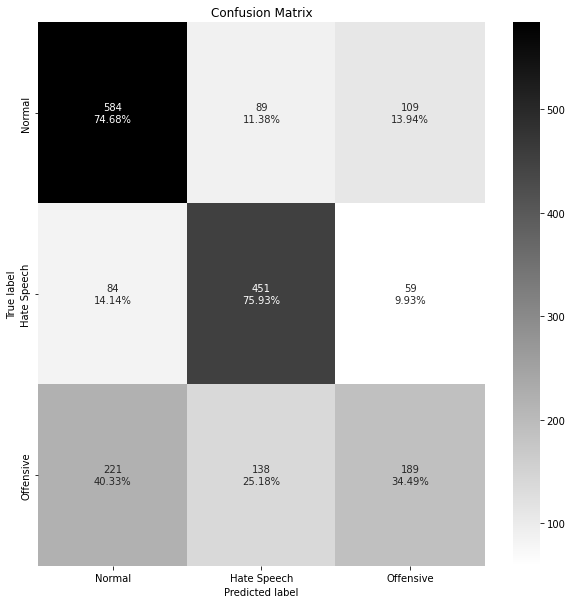

In [28]:
print("Test Data Accuracy: {0:0.2f}".format(accuracy_score(test_labels, y_pred_test_tkcount)))
    
print(classification_report(test_labels, y_pred_test_tkcount))
cf_matrix = confusion_matrix(test_labels, y_pred_test_tkcount)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()